In [1]:
#Dataset: https://www.kaggle.com/fayomi/advertising

#Part1: Exploratory Data Analysis
#Part2: Predicting Click or No_Click

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm
from scipy import stats

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler #(x-x_min)/(x_max-x_min)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#Import data
df = pd.read_csv('/Users/shinde/Desktop/Online_Ad_Click_Prediction/Advertisements.csv')
#df.shape
print('Dataset has', df.shape[0], 'rows and', df.shape[1], 'columns')

Dataset has 1000 rows and 10 columns


# Part 1 : Exploratory Data Analysis

In [4]:
#Replace column name whitespace with underscore
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'ad_topic_line', 'city', 'male', 'country',
       'timestamp', 'clicked_on_ad'],
      dtype='object')

In [5]:
#Create date-time variable using timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Month'] = df['timestamp'].dt.month
df['Day_of_the_month'] = df['timestamp'].dt.day
df["Day_of_the_week"] = df['timestamp'].dt.dayofweek
df['Hour'] = df['timestamp'].dt.hour
df['Year'] = df['timestamp'].dt.year

In [6]:
#Function to get 'unique values' by each column

def count_unique_values(df):
    column_list = list(df.columns)
    for column in column_list:
        unique_values = df[str(column)].nunique()
        print('column' ,str(column).strip(), 'has ------> ', unique_values,'unique values')
        
#Call count_unique_values() 
count_unique_values(df)

column daily_time_spent_on_site has ------>  900 unique values
column age has ------>  43 unique values
column area_income has ------>  1000 unique values
column daily_internet_usage has ------>  966 unique values
column ad_topic_line has ------>  1000 unique values
column city has ------>  969 unique values
column male has ------>  2 unique values
column country has ------>  237 unique values
column timestamp has ------>  1000 unique values
column clicked_on_ad has ------>  2 unique values
column Month has ------>  7 unique values
column Day_of_the_month has ------>  31 unique values
column Day_of_the_week has ------>  7 unique values
column Hour has ------>  24 unique values
column Year has ------>  1 unique values


In [7]:
#Delete Unnecessary features based on 'reasons'
df = df.drop(['timestamp','ad_topic_line', 'city','country',], axis=1)

#Notes:
#No pattern in ablove dropped features - MANY unique values
#Data is from 237 counties; all are on different time zone; 
#assuming all times & date are country specific to do further analysis

In [8]:
#Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [9]:
#Column Datatype Conversion
df['male'] = df['male'].astype('category')
df['clicked_on_ad'] = df['clicked_on_ad'].astype('category')


In [10]:
#Column Rename
df = df.rename(columns = {'daily_internet_usage':'daily_internet_usage_mins',
                          'daily_time_spent_on_site':'daily_time_spent_on_site_mins'
                         })

In [11]:
#Column Datatypes
df.dtypes

daily_time_spent_on_site_mins     float64
age                                 int64
area_income                       float64
daily_internet_usage_mins         float64
male                             category
clicked_on_ad                    category
month                               int64
day_of_the_month                    int64
day_of_the_week                     int64
hour                                int64
year                                int64
dtype: object

In [12]:
#NULL valuse by each column
df.isnull().sum()

daily_time_spent_on_site_mins    0
age                              0
area_income                      0
daily_internet_usage_mins        0
male                             0
clicked_on_ad                    0
month                            0
day_of_the_month                 0
day_of_the_week                  0
hour                             0
year                             0
dtype: int64

In [13]:
#Descriptive Statistics
df.describe()

,daily_time_spent_on_site_mins,age,area_income,daily_internet_usage_mins,month,day_of_the_month,day_of_the_week,hour,year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,65.000200,36.009000,55000.000080,180.000100,3.817000,15.484000,3.064000,11.660000,2016.0
std,15.853615,8.785562,13414.634022,43.902339,1.926973,8.734073,1.998474,6.960952,0.0
min,32.600000,19.000000,13996.500000,104.780000,1.000000,1.000000,0.000000,0.000000,2016.0
25%,51.360000,29.000000,47031.802500,138.830000,2.000000,8.000000,1.000000,6.000000,2016.0
50%,68.215000,35.000000,57012.300000,183.130000,4.000000,15.000000,3.000000,12.000000,2016.0
75%,78.547500,42.000000,65470.635000,218.792500,5.000000,23.000000,5.000000,18.000000,2016.0
max,91.430000,61.000000,79484.800000,269.960000,7.000000,31.000000,6.000000,23.000000,2016.0


In [14]:
#Insights:

#1. It's a FAMOUS website!! (A lot of time spent each day)
#2. Website is used by all age groups (adult to older)
#3. Website is used by people from all economic group (not wealthy to wealthy neighborhood)
#4. Website is used by Internet Savy group 

#daily_time_spent_on_site_mins: 
    #On average each user spend 65 minutes on the website
    #Median is 68 minutes
    #Minimum is 32 minute (~0.5 hours)
    #Maximum is 91 minutes (~1.5 hours)

#age:
    #Average age of website users is 36 years 
    #median is 35 years
    #Minimum age is 19 years
    #Maximum age is 61 years

#area_income: 
    #Average area income of our website users is $55,000 
    #median is $57K
    #Minimum area_income is 13,996
    #Maximum area_income is 79,484

#daily_internet_usage_mins:
    #Average daily_internet_usage_mins is 180 minutes (~3 hours)
    #Median is 183 minutes (~3 hours)
    #Min is 104 minutes (~1.7 hours)
    #Max is 269 minutes (~4.5 hours)


In [15]:
#Check #Males vs #Females
Male_Female_Website_Users =  df.groupby(['male']).size().reset_index(name = '#Website_Users')
Male_Female_Website_Users['%'] = (Male_Female_Website_Users['#Website_Users']/Male_Female_Website_Users['#Website_Users'].sum()) * 100
Male_Female_Website_Users

#More 'Female Users' of this perticular website

,male,#Website_Users,%
0,0,519,51.9
1,1,481,48.1


In [16]:
#Check ad click/No_Click
ad_clicks =  df.groupby(['clicked_on_ad']).size().reset_index(name = '#Website_Users')
ad_clicks['%'] = (ad_clicks['#Website_Users']/ad_clicks['#Website_Users'].sum()) * 100
ad_clicks

#Dataset is perfectly balanced (50% people clicked on ad & rest 50% didn't click on ad)
#This won't be the case in real world; we will have imbalanced dataset with low 'ad clicked' percentage

,clicked_on_ad,#Website_Users,%
0,0,500,50.0
1,1,500,50.0


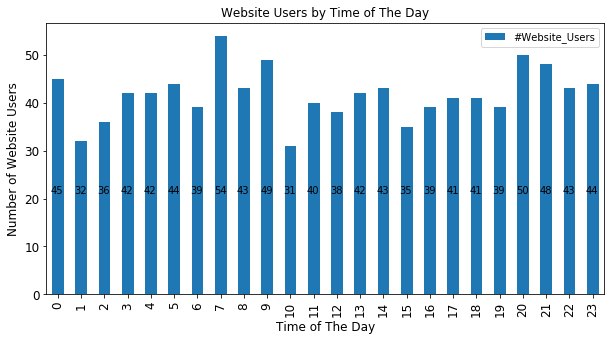

In [17]:
#1. Plot 'number of website users by time of the day'

#Prepare Data
Users_By_Hour =  df.groupby(['hour']).size().reset_index(name = '#Website_Users')

#------------------

#Plot Bar Graph
ax = Users_By_Hour[['#Website_Users']].plot(kind='bar', 
                                            title ="Website Users by Time of The Day", 
                                            figsize=(10, 5), 
                                            legend=True, 
                                            fontsize=12)

ax.set_xlabel("Time of The Day", fontsize=12)
ax.set_ylabel("Number of Website Users", fontsize=12)

#------------------

#Print labels on bar chart
labels = Users_By_Hour['#Website_Users']

for i, v in enumerate(labels):
    ax.text(i-.30, 
            v/labels[i] + 20, 
            labels[i], 
            fontsize=10,
            color='black'
           )
plt.show()

#------------------
#Insights:
#clock format 0 to 23
#Maximum website users are using the website at 7am in the morning followd by 8pm, 9am, 9pm
#website usage is evenly distributes across 24 hours

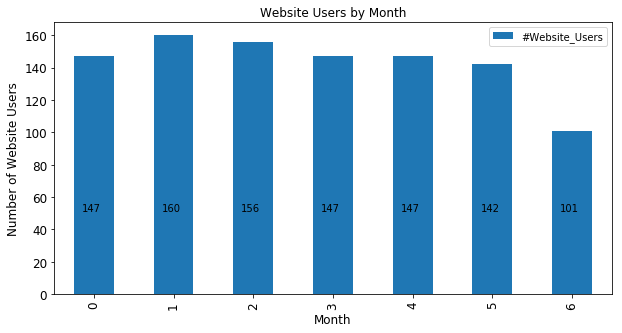

In [18]:
#2. Plot 'number of website users by month'

#Prepare Data
Users_By_Month =  df.groupby(['month']).size().reset_index(name = '#Website_Users')

#------------------

#Plot Bar Graph
ax = Users_By_Month[['#Website_Users']].plot(kind='bar', 
                                            title ="Website Users by Month", 
                                            figsize=(10, 5), 
                                            legend=True, 
                                            fontsize=12)

ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Number of Website Users", fontsize=12)

#------------------

#Print labels on bar chart
labels = Users_By_Month['#Website_Users']

for i, v in enumerate(labels):
    ax.text(i-.15, 
            v/labels[i] + 50, 
            labels[i], 
            fontsize=10,
            color='Black'
           )
plt.show()

#------------------
#Insights:
#Month format 0 to 11
#Maximum website users are observed in January & February 2016
#July 2016 had lowest number of website users 

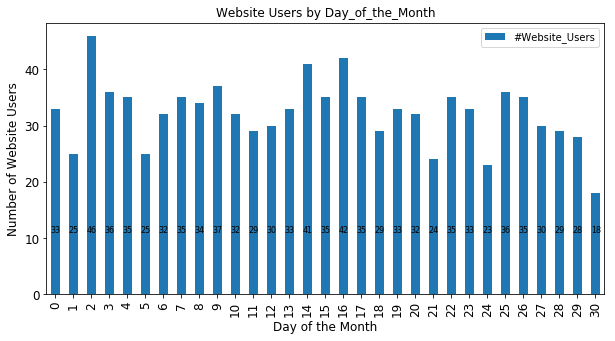

In [19]:
#2. Plot 'number of website users by day_of_the_month'

#Prepare Data
Users_By_day_of_the_month =  df.groupby(['day_of_the_month']).size().reset_index(name = '#Website_Users')

#------------------

#Plot Bar Graph
ax = Users_By_day_of_the_month[['#Website_Users']].plot(kind='bar', 
                                            title ="Website Users by Day_of_the_Month", 
                                            figsize=(10, 5), 
                                            legend=True, 
                                            fontsize=12)

ax.set_xlabel("Day of the Month", fontsize=12)
ax.set_ylabel("Number of Website Users", fontsize=12)

#------------------

#Print labels on bar chart
labels = Users_By_day_of_the_month['#Website_Users']

for i, v in enumerate(labels):
    ax.text(i-.25, 
            v/labels[i]+10, 
            labels[i], 
            fontsize=8,
            color='black'
           )
plt.show()

#------------------
#Insights:
#Month format 0 to 30
#Maximum website users are observed on 3rd day of the month followed by 17th & 15th day 
#(biweekly pay period? Relaxing? It's a social Media platform?)
#Lowest on last day of the month 31st - BUT not all months have 31st - so ingoring this pattern
#Lowest website vistiors/users observed end of the month (in general) 

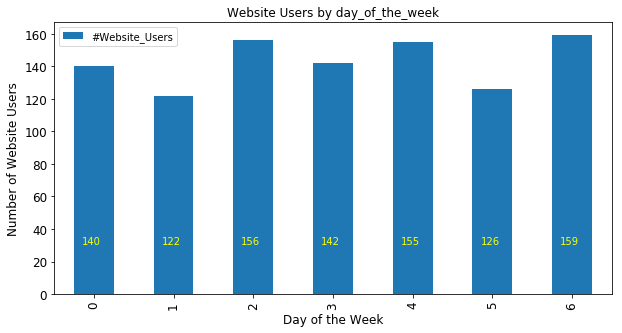

In [20]:
#3. Plot 'number of website users by day_of_the_week'

#Prepare Data
Users_By_day_of_the_week =  df.groupby(['day_of_the_week']).size().reset_index(name = '#Website_Users')

#------------------

#Plot Bar Graph
ax = Users_By_day_of_the_week[['#Website_Users']].plot(kind='bar', 
                                            title ="Website Users by day_of_the_week", 
                                            figsize=(10, 5), 
                                            legend=True, 
                                            fontsize=12)

ax.set_xlabel("Day of the Week", fontsize=12)
ax.set_ylabel("Number of Website Users", fontsize=12)

#------------------

#Print labels on bar chart
labels = Users_By_day_of_the_week['#Website_Users']

for i, v in enumerate(labels):
    ax.text(i-.15, 
            v/labels[i]+30, 
            labels[i], 
            fontsize=10,
            color='yellow'
           )
plt.show()


#------------------
#Insights:
#Month format 0 to 6 (Monday to Sunday)
#Maximum website users/visitors are observed on Wednesday, Friday & Sunday (mid week, end week & before starting week)
#Lowest on Tuesday(focusing on work) & Saturday (relaxing)

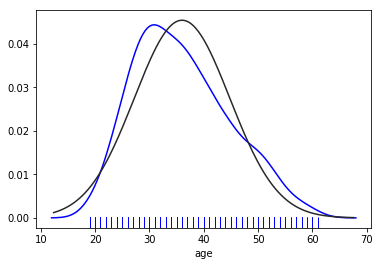

In [21]:
#Check Data Distribution: age
sns.distplot(df['age'], 
             hist=False, 
             color='b', 
             rug=True, 
             fit=norm);

#Age has normal distribution of data
#Decide ad targetting based on this age group of website users
#This website is best for targetting products made for age group between 22 & 42 (~ young adult population)
#Not good for targetting product made for older poplation - find different website to that job

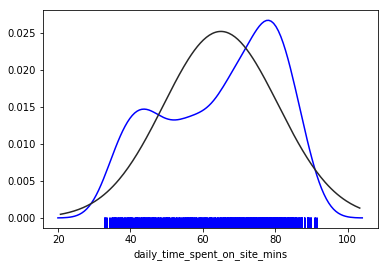

In [22]:
#Check Data Distribution: daily_time_spent_on_site_mins
sns.distplot(df['daily_time_spent_on_site_mins'], 
             hist=False, 
             color='b', 
             rug=True, 
             fit=norm);

#daily_time_spent_on_site_mins has not normal distribution of data
#People spend more than avergae time on website

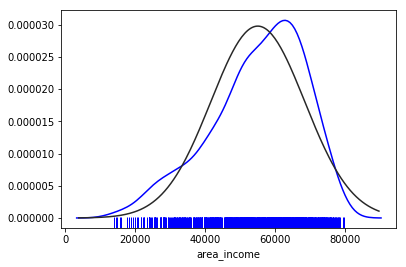

In [23]:
#Check Data Distribution: area_income
sns.distplot(df['area_income'], 
             hist=False, 
             color='b', 
             rug=True, 
             fit=norm);

#area_income has normal distribution of data
#More website users lives in Wealthy neighborhood

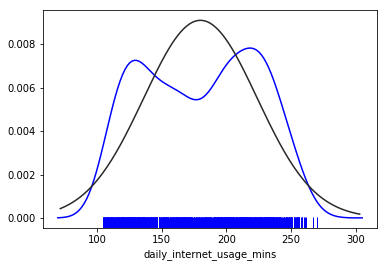

In [24]:
#Check Data Distribution: daily_internet_usage_mins
sns.distplot(df['daily_internet_usage_mins'], 
             hist=False, 
             color='b', 
             rug=True, 
             fit=norm);

#daily_internet_usage_mins is not normally distributed
#There are 2 major segments of website users based on internet usage: High internet users & medium internet users

#Note:******
#Do Data Normalization (vs feature scaling vs Standardization) and check distribution again - All Same 
#Compare model performance in those cases


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2344ee48>,
      dtype=object)

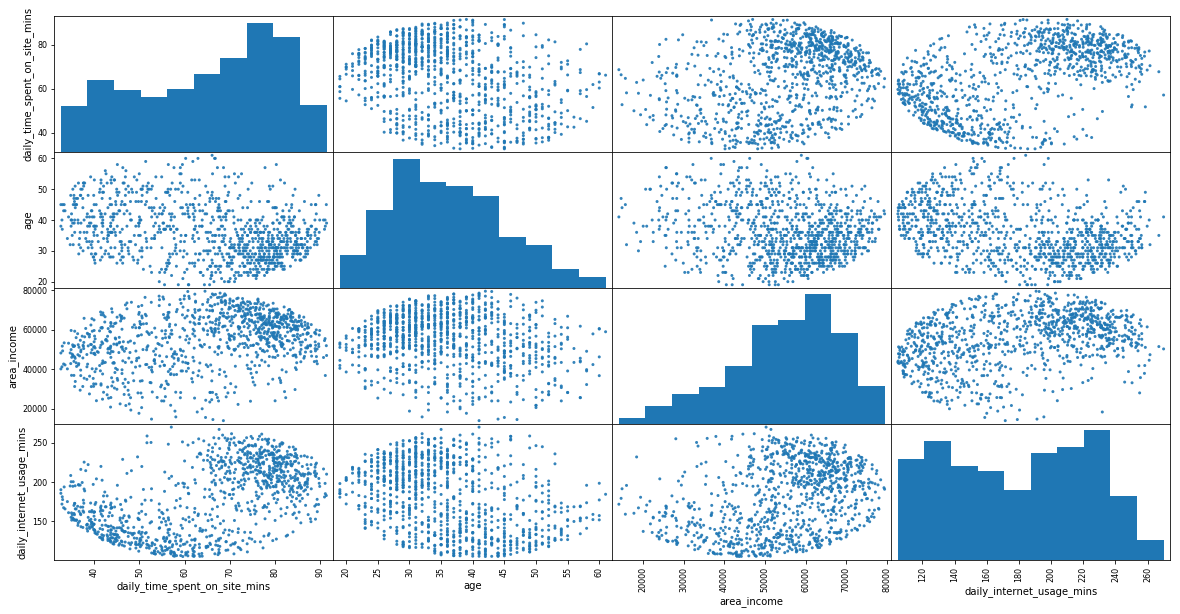

In [25]:
#Get data distribution of individual columns & also scatter plot with other columns in df
scatter_matrix(df[['daily_time_spent_on_site_mins', 'age','area_income', 'daily_internet_usage_mins']],
               alpha=0.9, 
               figsize=(20,10))


#Insights:
#Welthy neighborhood users spending more time on website (Not sure what kind of websiteis this.May be social media!)
#younger population spending more time on website (popular amongs young crowd)
#High internet users are spending more time on website (known website)

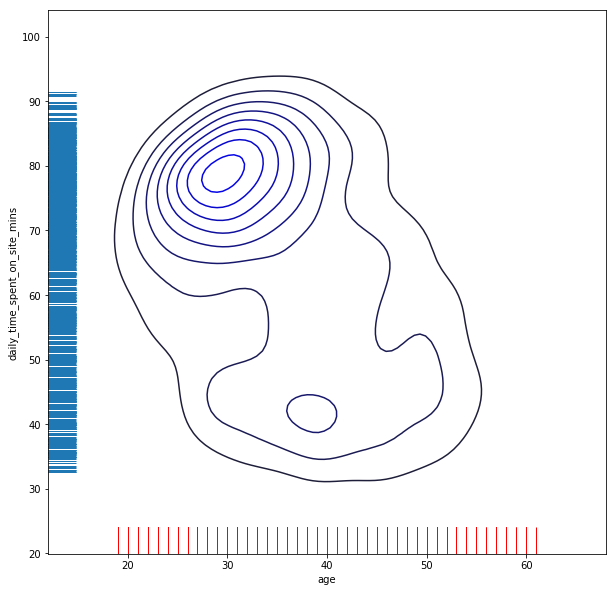

In [26]:
#two-dimensional density plot 
#Determine the interdependence of two variables

f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.age, df.daily_time_spent_on_site_mins, color="b", ax=ax)
sns.rugplot(df.age, color="r", ax=ax)
sns.rugplot(df.daily_time_spent_on_site_mins, vertical=True, ax=ax)

#younger users spend more time on this website. 
#younger population is main target group for the marketing campaign using this website. 


In [27]:
df.columns

Index(['daily_time_spent_on_site_mins', 'age', 'area_income',
       'daily_internet_usage_mins', 'male', 'clicked_on_ad', 'month',
       'day_of_the_month', 'day_of_the_week', 'hour', 'year'],
      dtype='object')

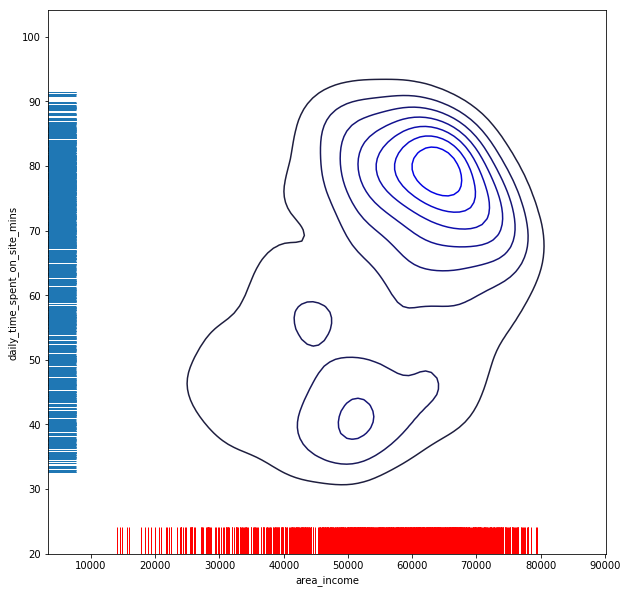

In [28]:
#two-dimensional density plot 
#Determine the interdependence of two variables

f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(df.area_income, df.daily_time_spent_on_site_mins, color="b", ax=ax)
sns.rugplot(df.area_income, color="r", ax=ax)
sns.rugplot(df.daily_time_spent_on_site_mins, vertical=True, ax=ax)

#Income_Area between $55K & $75K are best target areas - high usage of website by users from this group


In [29]:
del df['year']
df.head(2)

,daily_time_spent_on_site_mins,age,area_income,daily_internet_usage_mins,male,clicked_on_ad,month,day_of_the_month,day_of_the_week,hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1


In [30]:
#Correlation Study
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

#Age is negatively correlated with daily_time_spent_on_site_mins (-0.33)
#High positive corelation between daily_time_spent_on_site_mins & daily_internet_usage_mins (+0.51)

,daily_time_spent_on_site_mins,age,area_income,daily_internet_usage_mins,month,day_of_the_month,day_of_the_week,hour
daily_time_spent_on_site_mins,1,-0.331513,0.310954,0.518658,-0.0109196,-0.0112174,0.0183356,0.000894981
age,-0.331513,1,-0.182605,-0.367209,0.0236892,-0.0381616,0.013593,-0.0499051
area_income,0.310954,-0.182605,1,0.337496,-0.0502161,-0.0265234,0.0138787,0.0345729
daily_internet_usage_mins,0.518658,-0.367209,0.337496,1,0.0175299,-0.0125308,0.0090353,0.074347
month,-0.0109196,0.0236892,-0.0502161,0.0175299,1,-0.0172735,-0.0200897,-0.0137476
day_of_the_month,-0.0112174,-0.0381616,-0.0265234,-0.0125308,-0.0172735,1,0.0412347,-0.0170645
day_of_the_week,0.0183356,0.013593,0.0138787,0.0090353,-0.0200897,0.0412347,1,0.00703442
hour,0.000894981,-0.0499051,0.0345729,0.074347,-0.0137476,-0.0170645,0.00703442,1


In [31]:
#Correlation Significance (p Values)

def get_corr_pValue(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns = df.columns)
    pvalues = dfcols.transpose().join(dfcols, how = 'outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1],4)
    return pvalues

#Get p-values of correlation
get_corr_pValue(df)

#Clearly month, week & hour are not-significant


,daily_time_spent_on_site_mins,age,area_income,daily_internet_usage_mins,month,day_of_the_month,day_of_the_week,hour
daily_time_spent_on_site_mins,0,0,0,0,0.7302,0.7231,0.5625,0.9774
age,0,0,0,0,0.4543,0.2279,0.6677,0.1148
area_income,0,0,0,0,0.1125,0.4021,0.6611,0.2747
daily_internet_usage_mins,0,0,0,0,0.5798,0.6923,0.7754,0.0187
month,0.7302,0.4543,0.1125,0.5798,0,0.5853,0.5257,0.6641
day_of_the_month,0.7231,0.2279,0.4021,0.6923,0.5853,0,0.1926,0.5899
day_of_the_week,0.5625,0.6677,0.6611,0.7754,0.5257,0.1926,0,0.8242
hour,0.9774,0.1148,0.2747,0.0187,0.6641,0.5899,0.8242,0


# Part 2 : Predicting Click or No_Click

In [32]:
df.columns

Index(['daily_time_spent_on_site_mins', 'age', 'area_income',
       'daily_internet_usage_mins', 'male', 'clicked_on_ad', 'month',
       'day_of_the_month', 'day_of_the_week', 'hour'],
      dtype='object')

In [33]:
#Seperate Features & lables
features = df[['daily_time_spent_on_site_mins', 'age', 'area_income',
               'daily_internet_usage_mins', 'male', 'month',
               'day_of_the_month', 'day_of_the_week', 'hour'
              ]]

#target/outcome
labels = df['clicked_on_ad']


In [34]:
#Split data for train & test
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.20, 
                                                    random_state=42)


In [35]:
#Check Train & Test size
print('We will train on', X_train.shape[0], 'examples and predict on', y_test.shape[0], 'examples')

We will train on 800 examples and predict on 200 examples


In [36]:
#Logistic Regression
#In logistic regression applications of regularisation (l1 & l2) and a limited-memory optimiser/solver can be used
model_LR = LogisticRegression(solver='lbfgs') #1% Accuracy improvement by using solver = 'lbfgs'
model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)


/Users/shinde/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [37]:
#Confusion Metrics
print('Confusion Matrix for LR is:')
print(confusion_matrix(y_test,pred_LR))
print('')

confusion_ = confusion_matrix(y_test,pred_LR)
print('Model finished predictions on', y_test.shape[0], 'records!!')
print('LR Model predicted', confusion_[0][0] + confusion_[1][1], 'records correctly and', 
      confusion_[0][1] + confusion_[1][0], 'incorrectly')
print('Hence, Classificaiton Accuracy is:', accuracy_score(pred_LR, y_test))

Confusion Matrix for LR is:
[[86  3]
 [15 96]]

Model finished predictions on 200 records!!
LR Model predicted 182 records correctly and 18 incorrectly
Hence, Classificaiton Accuracy is: 0.91


In [38]:
#Print Model Performance
print('Detailed Classification Report is:')
print(classification_report(y_test, pred_LR))

Detailed Classification Report is:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91        89
           1       0.97      0.86      0.91       111

   micro avg       0.91      0.91      0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200

